# Tensorflow

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Supervised%20Learning/Parametric%20Modeling/Lecture%204%20Deep%20Neural%20Network/Tensorflow.ipynb)

In [50]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [4]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_X, train_y),(test_X, test_y)=fashion_mnist.load_data()
train_X, test_X=train_X/255, test_X/255

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [15]:
predictions = model(train_X[:1]).numpy()
predictions

array([[ 1.4951093 ,  0.29394946,  0.7901614 ,  1.2834516 ,  0.57772154,
         0.18168963, -1.755781  , -0.38931078, -0.15589246, -0.10425594]],
      dtype=float32)

In [16]:
tf.nn.softmax(predictions).numpy()

array([[0.25925407, 0.07799531, 0.12810633, 0.20979916, 0.10358792,
        0.06971314, 0.01004343, 0.03938513, 0.04973987, 0.05237573]],
      dtype=float32)

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
loss_fn(train_y[:1], predictions).numpy()

2.9493122

In [22]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [34]:
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2519 - accuracy: 0.9061 - val_loss: 0.3302 - val_accuracy: 0.8876
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9064 - val_loss: 0.3407 - val_accuracy: 0.8880
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2418 - accuracy: 0.9096 - val_loss: 0.3370 - val_accuracy: 0.8840
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2380 - accuracy: 0.9097 - val_loss: 0.3399 - val_accuracy: 0.8839
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2345 - accuracy: 0.9107 - val_loss: 0.3420 - val_accuracy: 0.8887
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2343 - accuracy: 0.9118 - val_loss: 0.3447 - val_accuracy: 0.8878
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2293 - accuracy: 0.9129 - val_loss: 0.3345 - val_accuracy:

In [35]:
model.evaluate(test_X,  test_y, verbose=2)

313/313 - 0s - loss: 0.3618 - accuracy: 0.8925 - 355ms/epoch - 1ms/step


[0.36181744933128357, 0.8924999833106995]

In [36]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

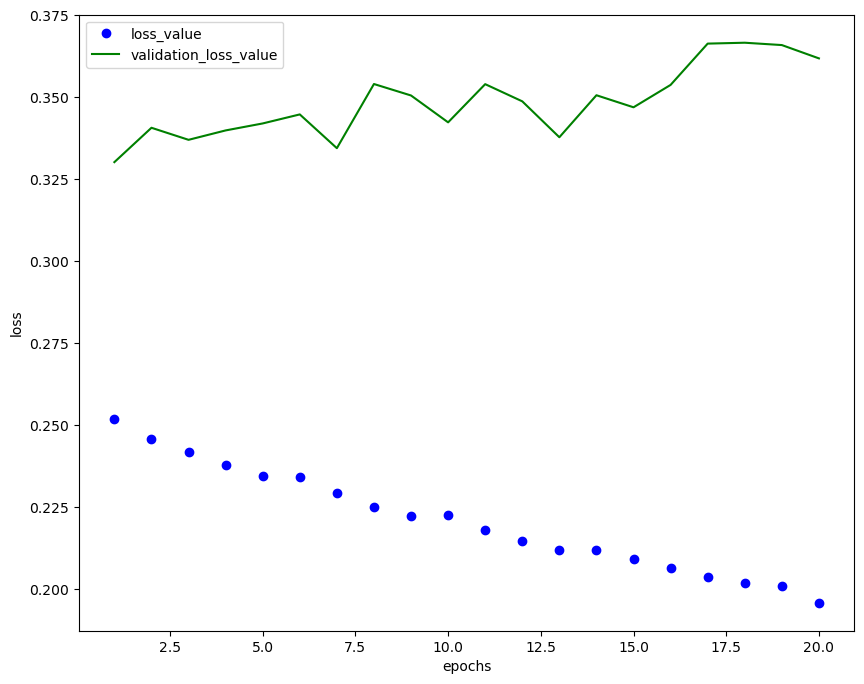

In [48]:
import matplotlib.pyplot as plt

loss_value=history_dict['loss']
validation_loss_value=history_dict['val_loss']
epochs=range(1, len(loss_value)+1)

plt.figure(figsize=(10,8))
plt.plot(epochs, loss_value,'bo', label="loss_value")
plt.plot(epochs, validation_loss_value,'g', label="validation_loss_value")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

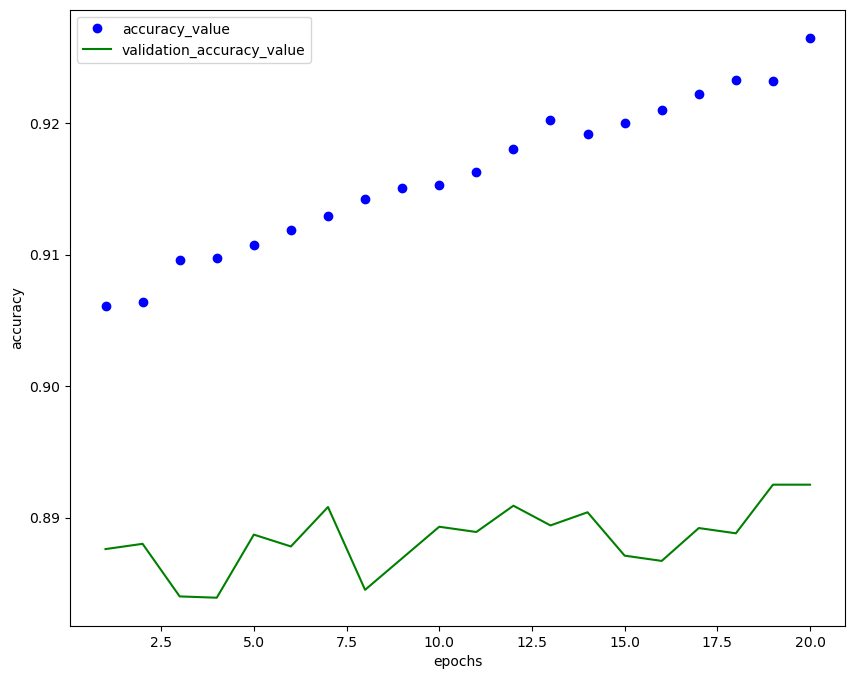

In [49]:
accuracy_value=history_dict['accuracy']
validation_accuracy_value=history_dict['val_accuracy']
epochs=range(1,len(accuracy_value)+1)

plt.figure(figsize=(10,8))
plt.plot(epochs,accuracy_value,'bo',label="accuracy_value")
plt.plot(epochs,validation_accuracy_value,'g',label='validation_accuracy_value')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()